In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import stats

import allensdk
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorNeuropixelsProjectCache

# Confirming your allensdk version
print(f"Your allensdk version is: {allensdk.__version__}")

/Users/zhangpan/anaconda3/envs/neuropixels/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Your allensdk version is: 2.15.2


# Download ecephys_cache (5 tables: Ecephys Sessions, Behavior Sessions, Units, Probes, Channels)

In [2]:
# Update this to a valid directory in the filesystem. This is where the data will be stored.
output_dir = "./ecephys_cache/"
DOWNLOAD_COMPLETE_DATASET = False

In [3]:
output_dir = Path(output_dir)
cache = VisualBehaviorNeuropixelsProjectCache.from_s3_cache(cache_dir=output_dir)

In [4]:
# Load latest manifest
cache.load_latest_manifest()

# Get a session

In [6]:
# access information about a specific ecephys session (ecephys_session_id=1048189115)
session = cache.get_ecephys_session(ecephys_session_id=1067790400)

ecephys_session_1067790400.nwb: 100%|██████████| 1.77G/1.77G [20:42<00:00, 1.43MMB/s]    
/Users/zhangpan/anaconda3/envs/neuropixels/lib/python3.8/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.8.0 because version 1.5.1 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/Users/zhangpan/anaconda3/envs/neuropixels/lib/python3.8/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/Users/zhangpan/anaconda3/envs/neuropixels/lib/python3.8/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.5.0 because version 0.2.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [7]:
# List methods of the session that can be used to get data
session.list_data_attributes_and_methods()

['behavior_data_class',
 'behavior_session_id',
 'eye_tracking',
 'eye_tracking_rig_geometry',
 'get_channels',
 'get_current_source_density',
 'get_lfp',
 'get_performance_metrics',
 'get_probes_obj',
 'get_reward_rate',
 'get_rolling_performance_df',
 'get_units',
 'licks',
 'mean_waveforms',
 'metadata',
 'optotagging_table',
 'probes',
 'raw_running_speed',
 'rewards',
 'running_speed',
 'spike_amplitudes',
 'spike_times',
 'stimulus_presentations',
 'stimulus_templates',
 'stimulus_timestamps',
 'task_parameters',
 'trials']

In [8]:
session.metadata

{'equipment_name': 'NP.1',
 'sex': 'M',
 'age_in_days': 120,
 'stimulus_frame_rate': 60.0,
 'session_type': 'EPHYS_1_images_H_3uL_reward',
 'date_of_acquisition': datetime.datetime(2020, 12, 3, 23, 10, 53, tzinfo=tzutc()),
 'reporter_line': 'Ai32(RCL-ChR2(H134R)_EYFP)',
 'cre_line': 'Vip-IRES-Cre',
 'behavior_session_uuid': UUID('879c8850-3e03-4c0f-bfbb-24834420469a'),
 'driver_line': ['Vip-IRES-Cre'],
 'mouse_id': '546512',
 'project_code': 'Not Available',
 'full_genotype': 'Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt',
 'behavior_session_id': 1067835184,
 'ecephys_session_id': 1067790400}

In [9]:
# get the unit and channel data for this session
units = session.get_units()
channels = session.get_channels()

unit_channels = units.merge(channels, left_on='peak_channel_id', right_index=True)

In [10]:
# brain structures were recorded during this session
unit_channels.value_counts('structure_acronym')

structure_acronym
CA1      276
VISl     154
DG       142
VISpm    104
VISal     94
VISrl     79
VISp      77
VISam     66
APN       64
CA3       60
POST      48
SGN       44
PoT       44
MRN       36
LP        23
HPF       16
MB        14
SCig      13
TH        10
root       8
MGv        7
ProS       6
POL        6
ZI         4
PIL        2
dtype: int64

In [11]:
# Listing the different stimuli templates
session.stimulus_templates

,unwarped,warped
image_name,,
im104_r,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","[[136, 138, 140, 141, 141, 141, 140, 140, 140,..."
im114_r,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","[[193, 190, 192, 194, 190, 182, 175, 173, 174,..."
im083_r,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","[[6, 9, 2, 0, 0, 0, 7, 5, 0, 0, 0, 2, 7, 6, 2,..."
im005_r,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","[[81, 82, 80, 76, 76, 80, 83, 82, 80, 78, 78, ..."
im087_r,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","[[38, 39, 34, 28, 28, 35, 41, 39, 34, 31, 33, ..."
im024_r,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","[[19, 21, 15, 8, 8, 17, 23, 22, 15, 11, 14, 19..."
im111_r,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","[[53, 55, 50, 44, 45, 51, 56, 56, 52, 49, 50, ..."
im034_r,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","[[124, 126, 128, 128, 129, 129, 129, 129, 127,..."


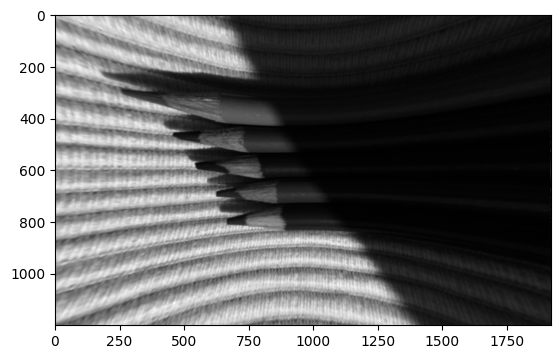

In [12]:
# Visualizing a particular stimulus
plt.imshow(session.stimulus_templates['warped']['im114_r'], cmap='gray')

In [13]:
# List the parameters for the task
session.task_parameters

{'auto_reward_volume': 0.005,
 'blank_duration_sec': [0.5, 0.5],
 'n_stimulus_frames': 69628,
 'omitted_flash_fraction': 0.05,
 'response_window_sec': [0.15, 0.75],
 'reward_volume': 0.003,
 'session_type': 'EPHYS_1_images_H_3uL_reward',
 'stimulus': 'images',
 'stimulus_distribution': 'geometric',
 'stimulus_duration_sec': 0.25,
 'task': 'change detection'}

In [14]:
session.spike_times

{1076839555: array([2262.31424521, 2513.3412913 , 2518.33865756, 2557.35112103,
        2647.49901364, 2856.62496316, 2868.81416216, 3061.50211304,
        3113.89627541, 3190.43526914, 3309.84675935, 3381.20318683,
        3429.37834955, 6847.01926944, 6939.95516182, 7202.36090698,
        7231.89077122, 7419.66575583, 7446.14752033, 7458.52738598,
        7506.13611541, 7555.94534466, 7648.83800372, 7699.8685662 ,
        7704.25576584, 7718.78883132, 8010.97927403, 8185.37662641,
        8194.40469233, 8384.11841012, 8467.46270329, 8520.16479897,
        8646.54058861, 9081.05198633, 9084.38148606, 9085.86431927,
        9102.60335123, 9128.02228248, 9128.02711581, 9128.50561577,
        9128.69314909, 9129.15364905, 9129.3903157 , 9129.49401569,
        9129.72318234, 9130.1777823 , 9135.92748183, 9144.22921448,
        9144.82941443, 9145.03734775, 9145.74021436, 9146.09051433,
        9146.15601433, 9267.00013775, 9281.56913656, 9294.13493553,
        9298.50030184, 9327.16003282

# Stimulus Presentation

In [15]:
# Stimulus presentation: Every stimulus we presented to the mouse over the course of this experiment
stimulus_presentations = session.stimulus_presentations
stimulus_presentations.columns

Index(['active', 'color', 'contrast', 'duration', 'end_frame',
       'flashes_since_change', 'image_name', 'is_change', 'is_image_novel',
       'is_sham_change', 'omitted', 'orientation', 'position_x', 'position_y',
       'rewarded', 'spatial_frequency', 'start_frame', 'start_time',
       'stimulus_block', 'stimulus_index', 'stimulus_name', 'end_time',
       'temporal_frequency', 'trials_id'],
      dtype='object')

In [16]:
# The different stimuli are indexed by the 'stimulus_block' column.
stimulus_presentations.groupby('stimulus_block')[['stimulus_block', 
                                                'stimulus_name', 
                                                'active', 
                                                'duration', 
                                                'start_time']].head(1)

,stimulus_block,stimulus_name,active,duration,start_time
stimulus_presentations_id,,,,,
0,0,Natural_Images_Lum_Matched_set_ophys_H_2019,True,0.250217,26.818581
4805,1,spontaneous,False,10.008360,3654.066982
4806,2,gabor_20_deg_250ms,False,0.250209,3664.075342
8451,3,spontaneous,False,288.991745,4576.087857
8452,4,flash_250ms,False,0.250212,4865.079602
8602,5,Natural_Images_Lum_Matched_set_ophys_H_2019,False,0.250205,5188.833785


# Grab unit, Make PSTH

In [17]:
# Grab spike times and calculate the change response for 'good' units in V1
#first let's sort our units by depth
unit_channels = unit_channels.sort_values('probe_vertical_position', ascending=False)

#now we'll filter them
good_unit_filter = (
                    (unit_channels['snr']>1)&
                    (unit_channels['isi_violations']<1)&
                    (unit_channels['firing_rate']>0.1)
                    )

good_units = unit_channels.loc[good_unit_filter]
spike_times = session.spike_times

In [18]:
#Convenience function to compute the PSTH
# PSTH gives the trial-averaged spike rate for each time bin aligned to the start times;
def makePSTH(spikes, startTimes, windowDur, binSize=0.01):
    bins = np.arange(0,windowDur+binSize,binSize)
    counts = np.zeros(bins.size-1)
    for i,start in enumerate(startTimes):
        startInd = np.searchsorted(spikes, start)
        endInd = np.searchsorted(spikes, start+windowDur)
        counts = counts + np.histogram(spikes[startInd:endInd]-start, bins)[0]
    
    counts = counts/startTimes.size
    return counts/binSize, bins

# PSTH for image change in SCig

In [19]:
# take the image changes shown during the active behavior block
change_times = stimulus_presentations[stimulus_presentations['active']&
                            stimulus_presentations['is_change']]['start_time'].values
change_times_end = stimulus_presentations[stimulus_presentations['active']&
                            stimulus_presentations['is_change']]['end_time'].values

In [ ]:
# find the start times of a target image shown during the active behavior block (im104r)
# target_image = 'im104_r'
# image_presentation_all = stimulus_presentations[stimulus_presentations['image_name'] == target_image]
# image_presentation = image_presentation_all[image_presentation_all['active']== True]
# image_times = image_presentation['start_time'].values
# image_times_end = image_presentation['end_time'].values

In [ ]:
# # Find the spontaneous pupil area in block 3
# spontaneous_behavior_3 = stimulus_presentations[stimulus_presentations['stimulus_block'] == 3]
# start_time_3 = spontaneous_behavior_3['start_time'].values
# end_time_3 = spontaneous_behavior_3['end_time'].values

In [26]:
# Include enough time in our plot to see three image responses: 
# the pre-change image response, the change response and the post-change response

#Here's where we loop through the units in our area of interest and compute their PSTHs
area_of_interest = 'SCig'
area_change_responses = []
area_units = good_units[good_units['structure_acronym']==area_of_interest]
time_before_change = 0.5
duration = 1.25 # including 0.5s greyscreen before + 0.25s image + 0.5s greyscreen after
# duration = float(end_time_3) - float(start_time_3) #only in block3

for iu, unit in area_units.iterrows():
    unit_spike_times = spike_times[iu]
    unit_change_response, bins = makePSTH(unit_spike_times, 
                                          change_times-time_before_change, 
                                          duration, binSize=0.05)
    area_change_responses.append(unit_change_response) 
area_change_responses = np.array(area_change_responses)


## Population (all unit in SCig)

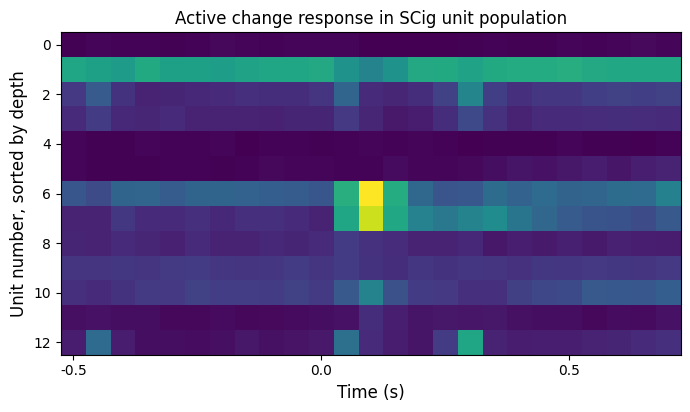

In [27]:
#Create figure of peristimulus time histograms for image change in SCig units 

fig, ax = plt.subplots(figsize=(8,8))

clims = [np.percentile(area_change_responses, p) for p in (0.1,99.9)]
im = ax.imshow(area_change_responses, clim=clims)

ax.set_title('Active change response in {} unit population'.format(area_of_interest))
ax.set_ylabel('Unit number, sorted by depth',fontsize=12)
ax.set_xlabel('Time (s)', fontsize=12)
ax.set_xticks(np.arange(0, bins.size-1, 10))
_ = ax.set_xticklabels(np.round(bins[:-1:10]-time_before_change, 2))



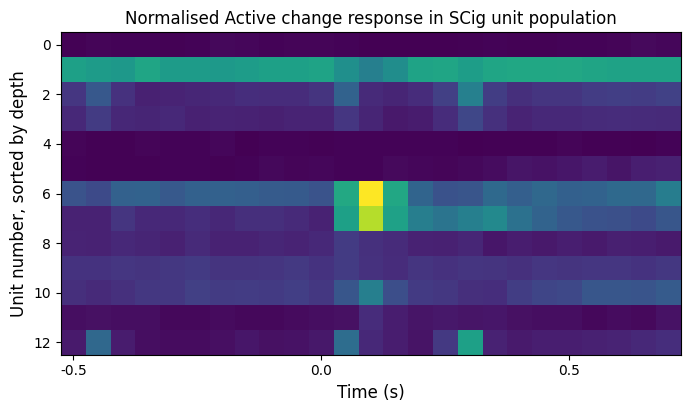

In [28]:
# Normalised the change response with Min-Max scaling
min_val = np.min(area_change_responses)
max_val = np.max(area_change_responses)
normalized_area_change_responses = (area_change_responses - min_val) / (max_val - min_val)

#Create figure of peristimulus time histograms for image change in SCig units (after scaling)

fig, ax = plt.subplots(figsize=(8,8))

clims = [np.percentile(area_change_responses, p) for p in (0.1,99.9)]
im = ax.imshow(normalized_area_change_responses, clim=(0, 1)) # Adjust clim values

ax.set_title('Normalised Active change response in {} unit population'.format(area_of_interest))
ax.set_ylabel('Unit number, sorted by depth',fontsize=12)
ax.set_xlabel('Time (s)', fontsize=12)
ax.set_xticks(np.arange(0, bins.size-1, 10))
_ = ax.set_xticklabels(np.round(bins[:-1:10]-time_before_change, 2))

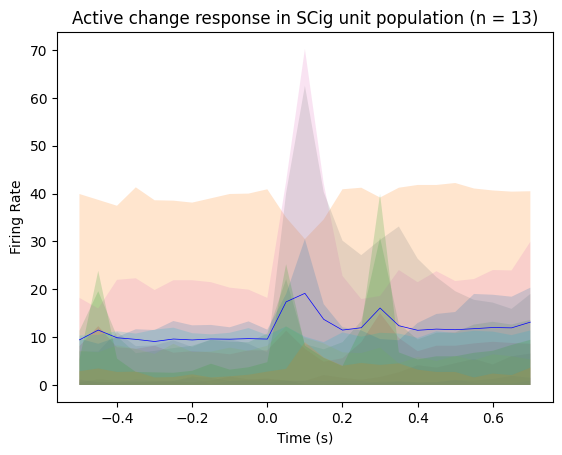

In [29]:
# Unit Response and mean
# Calculate the mean and standard deviation
mean_response = np.mean(area_change_responses, axis=0)  # the average firing rate over time
std_response = np.std(area_change_responses, axis=0)   # the degree of variation or uncertainty in those firing rates at each time point

# Plot individual unit responses with shadows
for unit_response in area_change_responses:
    plt.fill_between(bins[:-1] - time_before_change, unit_response, alpha=0.2)

# Plot the mean response in blue
plt.plot(bins[:-1] - time_before_change, mean_response, 'b-', linewidth=0.5)

plt.title('Active change response in {} unit population (n = {})'.format(area_of_interest, area_change_responses.shape[0]))
plt.xlabel('Time (s)')
plt.ylabel('Firing Rate')

plt.show()

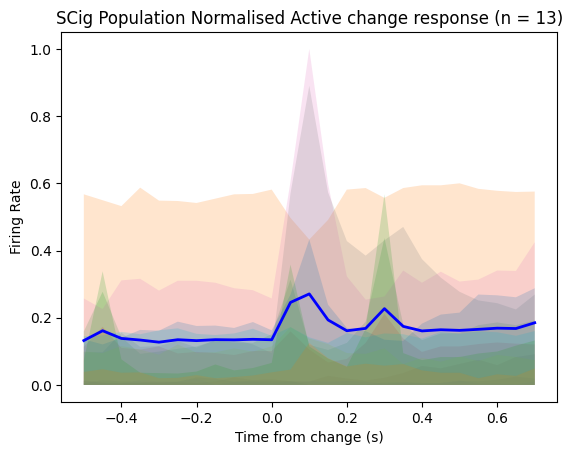

In [30]:
# # Plot the normalised active change response 

# Calculate the mean and standard deviation
normalized_mean_response = np.mean(normalized_area_change_responses, axis=0)
normalized_std_response = np.std(normalized_area_change_responses, axis=0)

# Plot individual unit responses with shadows
for unit_response in normalized_area_change_responses:
    plt.fill_between(bins[:-1] - time_before_change, unit_response, alpha=0.2)

# Plot the mean response in blue
plt.plot(bins[:-1] - time_before_change, normalized_mean_response, 'b-', linewidth=2)

plt.title('{} Population Normalised Active change response (n = {})'.format(area_of_interest, area_change_responses.shape[0]))
plt.xlabel('Time from change (s)')
plt.ylabel('Firing Rate')

plt.show()

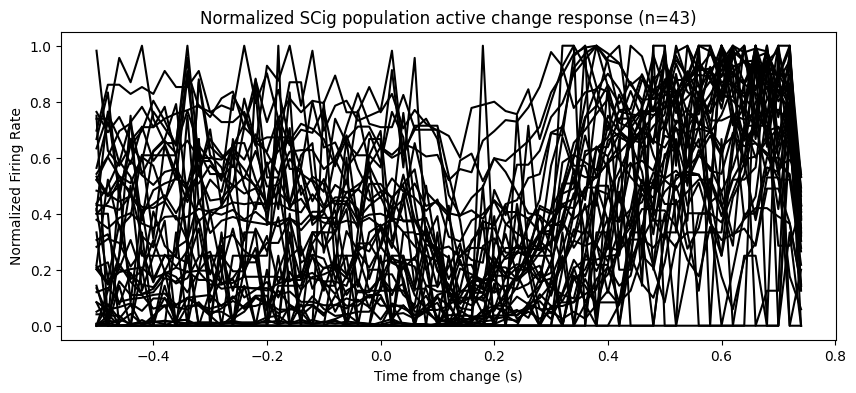

In [ ]:
# Calculate the max spike count for each unit_change_response array
max_spike_counts = np.max(area_change_responses, axis=1)

# Normalize each unit_change_response array by its max spike count
normalized_responses = area_change_responses / max_spike_counts[:, np.newaxis]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 4))

# Plot the normalized data
# bins = np.arange(0, normalized_responses.shape[1])
for i, response in enumerate(normalized_responses):
    ax.plot(bins[:-1] - time_before_change, response, color='black',label=f'Unit {i + 1}')

# Set the plot title and labels
ax.set_title(f'Normalized {area_of_interest} population active change response (n={area_change_responses.shape[0]})')
ax.set_xlabel('Time from change (s)')
ax.set_ylabel('Normalized Firing Rate')

# Show the plot
plt.show()


## Single unit in SCig (max response and min response)

In [ ]:
# Grab the unit with max response from area_change_responses
#_unit_id = area_units.index.values[0]
max_unit = area_change_responses[np.argmax(area_change_responses.sum(axis=1))]


In [ ]:
# Grab the unit with min response from area_change_responses
min_unit = area_change_responses[np.argmin(area_change_responses.sum(axis=1))]

Text(0, 0.5, 'Firing Rate (Hz)')

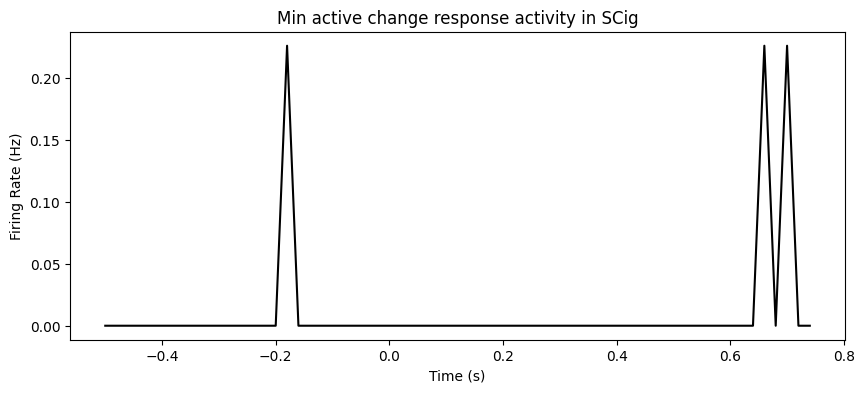

In [ ]:
# Plot the firing rate of one unit from SCig during active change
binsize = 5
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(bins[:-1]-time_before_change, np.array(min_unit), 'k-')

ax.set_title('Min active change response activity in {}'\
                .format(area_of_interest))
ax.set_xlabel('Time (s)')
ax.set_ylabel('Firing Rate (Hz)')

# Pupil Data

In [ ]:
# Grab pupil area data (eliminate blinks)
eye_tracking = session.eye_tracking
eye_tracking_noblinks = eye_tracking[~eye_tracking['likely_blink']]
pupil_area_raw = eye_tracking_noblinks['pupil_area_raw']

# Create a dataFrame that contains timestamps and pupil_area_raw
df = pd.DataFrame(eye_tracking_noblinks)
df_pupil_area_timestamps = df[['timestamps','pupil_area_raw']]
df_pupil_area_timestamps

,timestamps,pupil_area_raw
frame,,
15,1.63867,18806.507386
16,1.65534,18936.839899
17,1.67201,18958.585613
18,1.68867,18879.069459
19,1.70534,18472.155641
...,...,...
572774,9547.41300,18828.641372
572775,9547.42967,18849.667312
572776,9547.44633,19172.177025


In [ ]:
# Find the pupil areas during the time we need 
start_times = change_times - 0.5
end_times = start_times + duration

df_start_end = pd.DataFrame()
df_start_end['start_time'] = start_times
df_start_end['end_time'] = end_times
# df_start_end['end_time'] = image_times_end

df_start_end = df_start_end.iloc[:]
df_start_end


,start_time,end_time
0,56.692411,57.942411
1,70.203685,71.453685
2,82.213706,83.463706
3,98.744183,99.994183
4,122.013638,123.263638
...,...,...
216,3550.765163,3552.015163
217,3559.022058,3560.272058
218,3592.049698,3593.299698
219,3599.555980,3600.805980


In [ ]:
# Find the time between each stimulus
filtered_rows = []
time_before_change = 0.5

pupil_area_change = pd.DataFrame()

for index, row in df_start_end.iterrows():
    mask = (df_pupil_area_timestamps['timestamps'] >= row['start_time']) & (df_pupil_area_timestamps['timestamps'] <= row['end_time'])
    filtered_rows = df_pupil_area_timestamps.loc[mask].copy()
    filtered_rows['timestamp_diff'] = filtered_rows['timestamps'] - row['start_time']
    pupil_area_change = pd.concat([pupil_area_change, filtered_rows])

pupil_area_change['Time_from_Change'] = pupil_area_change['timestamp_diff'] - time_before_change
pupil_area_change


,timestamps,pupil_area_raw,timestamp_diff,Time_from_Change
frame,,,,
3319,56.70416,3674.322212,0.011749,-0.488251
3320,56.72082,3664.761323,0.028409,-0.471591
3321,56.73749,3520.255993,0.045079,-0.454921
3322,56.75416,3731.755024,0.061749,-0.438251
3323,56.77082,3479.603251,0.078409,-0.421591
...,...,...,...,...
216551,3610.49293,2485.440746,1.178791,0.678791
216552,3610.50960,2301.211707,1.195461,0.695461
216553,3610.52627,2248.856094,1.212131,0.712131


In [ ]:
df_pupil_time = pd.DataFrame()
df_pupil_time['pupil_area'] = pupil_area_change['pupil_area_raw']
df_pupil_time['time_from_change'] = pupil_area_change['Time_from_Change']

df_pupil_time = df_pupil_time.iloc[:]
df_pupil_time

,pupil_area,time_from_change
frame,,
3319,3674.322212,-0.488251
3320,3664.761323,-0.471591
3321,3520.255993,-0.454921
3322,3731.755024,-0.438251
3323,3479.603251,-0.421591
...,...,...
216551,2485.440746,0.678791
216552,2301.211707,0.695461
216553,2248.856094,0.712131


In [ ]:
# Downsampling the mean pupil size for spontaneous response to binsize = 5
# Convert the "Timestamps" column to numeric (e.g., in seconds)
df_pupil_time['time_from_change'] = pd.to_numeric(df_pupil_time['time_from_change'], errors='coerce')

binsize = 0.02  # 50ms bin size

# Create a new column "Interval" to represent the interval each data point belongs to
df_pupil_time['Interval'] = (df_pupil_time['time_from_change'] // binsize).astype(int)


# Group the data by "Interval" and calculate the mean pupil size
downsampled_df = df_pupil_time.groupby('Interval').agg(
    Start_Time=('time_from_change', 'min'),  # Start time of the interval
    Mean_Pupil_Size=('pupil_area', 'mean')  # Mean pupil size within the interval
).reset_index()


# Reset the index
downsampled_df.reset_index(drop=True, inplace=True)

# Set the colour of pupil size during different stage
colors = []
for start in downsampled_df['Start_Time']:
    if start <= 0:
        colors.append('green')  # green color for spontaneous pupil size before image change
    elif 0 < start <= 0.25:
        colors.append('red')  #  red color for during image
    else:
        colors.append('blue')  # blue colour for spontaneous after image

# The downsampled DataFrame now contains the mean pupil area for each 5-second interval
print(downsampled_df)


    Interval  Start_Time  Mean_Pupil_Size
0        -25   -0.499981      2808.598124
1        -24   -0.479689      2810.980312
2        -23   -0.459841      2835.681756
3        -22   -0.439991      2829.955152
4        -21   -0.419979      2847.396175
..       ...         ...              ...
58        33    0.660060      2918.796848
59        34    0.680010      2896.651838
60        35    0.700150      2873.916381
61        36    0.720281      2858.334652
62        37    0.740129      2872.905810

[63 rows x 3 columns]


Text(0.5, 0, 'Time from change (s)')

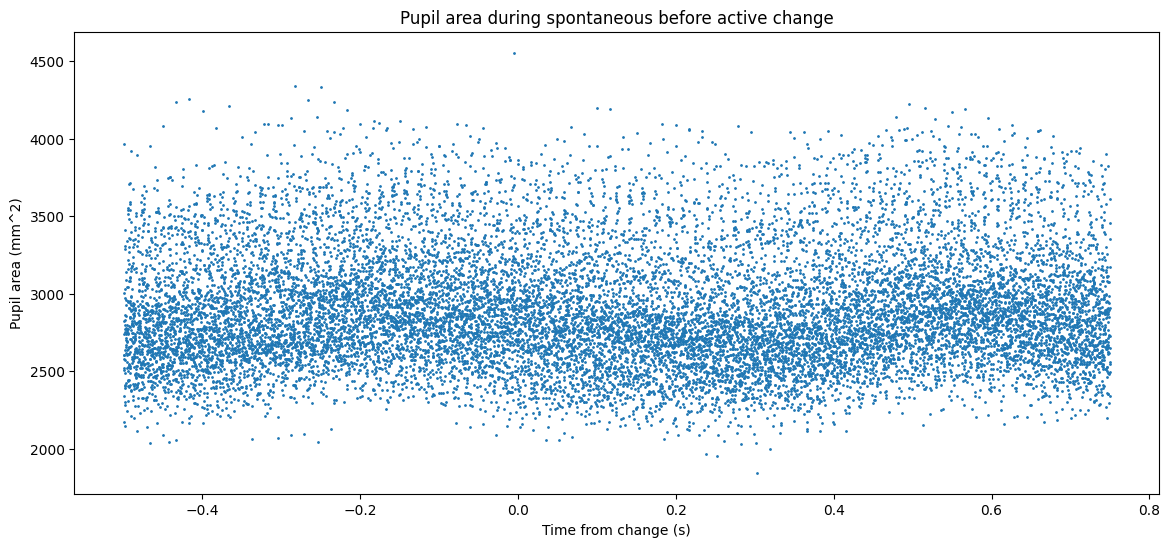

In [ ]:
x = pupil_area_change['Time_from_Change']
y = pupil_area_change['pupil_area_raw']

fig, ax = plt.subplots()
fig.set_size_inches(14,6)


pupil_plt = ax.scatter(x, y, s=1)

ax.set_title('Pupil area during spontaneous before active change')
ax.set_ylabel('Pupil area (mm^2)')
ax.set_xlabel('Time from change (s)')


# Correlation pupil size and firing rate

9.70287


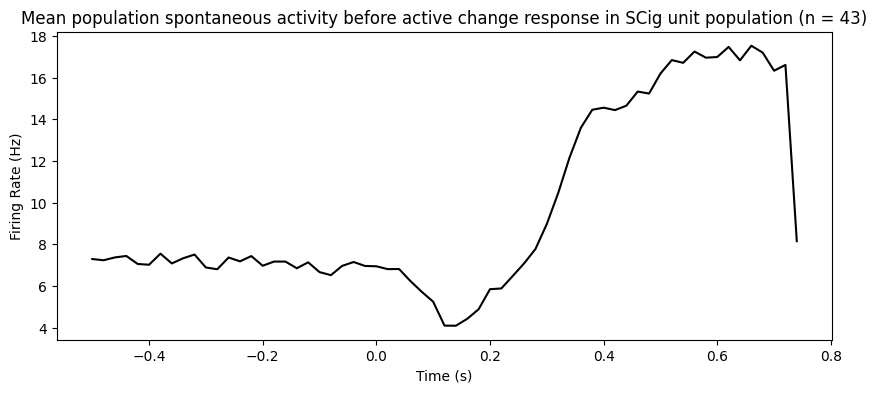

In [ ]:
# Plot the firing rate of SCig population during active change
binsize = 0.02
x = bins[:-1]-time_before_change  # Hertz represents the number of times something occurs per second.
mean_fring_rate = np.mean(area_change_responses, axis=0)


fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x, mean_fring_rate, 'k-')

ax.set_title('Mean population spontaneous activity before active change response in {} unit population (n = {})'.format(area_of_interest, area_change_responses.shape[0]))
ax.set_xlabel('Time (s)')
ax.set_ylabel('Firing Rate (Hz)')

baseline = np.mean(mean_fring_rate)
print(f"{baseline:.5f}")

In [ ]:
# # Calculate the mean pupil area within each time bin
binsize = 0.02

# Step 2: Align mean pupil area with each time bin
pupil_timestamps_change = pupil_area_change['timestamp_diff'].values
pupil_areas_change = pupil_area_change['pupil_area_raw'].values

# Initialize an array to store mean pupil areas
mean_pupil_areas = []

# Calculate the mean pupil area within each time bin
for bin_start, bin_end in zip(bins[:-1], bins[1:]):
    bin_pupil_areas = [area for area, timestamp in zip(pupil_areas_change, pupil_timestamps_change) if bin_start <= timestamp < bin_end]
    if bin_pupil_areas:
        mean_area = np.mean(bin_pupil_areas)
        mean_pupil_areas.append(mean_area)
    else:
        mean_pupil_areas.append(0)  # You can change this to NaN or any other value for empty bins



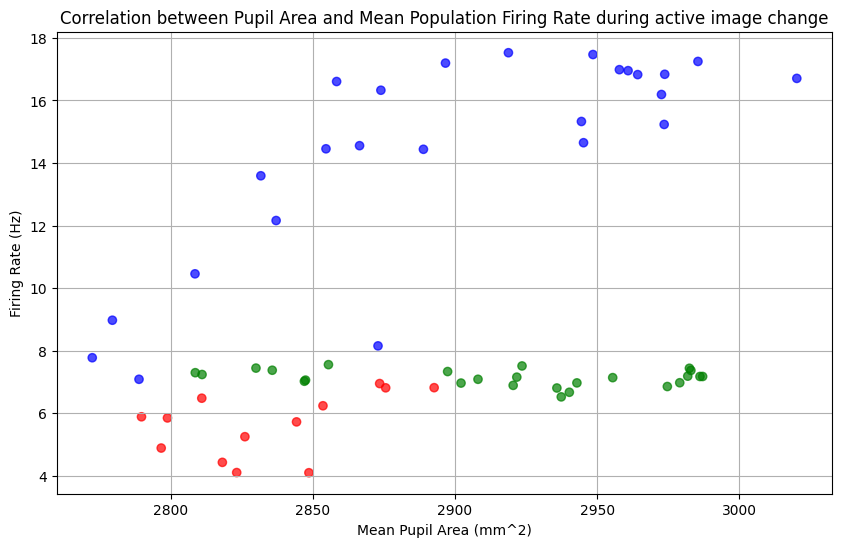

In [ ]:
# Plot the correlation between pupil area and firing rate

plt.figure(figsize=(10, 6))
plt.scatter(downsampled_df['Mean_Pupil_Size'], mean_fring_rate, marker='o', c=colors,label='Data Points', alpha=0.7)
plt.title(f'Correlation between Pupil Area and Mean Population Firing Rate during active image change')
plt.xlabel('Mean Pupil Area (mm^2)')
plt.ylabel('Firing Rate (Hz)')
plt.grid(True)

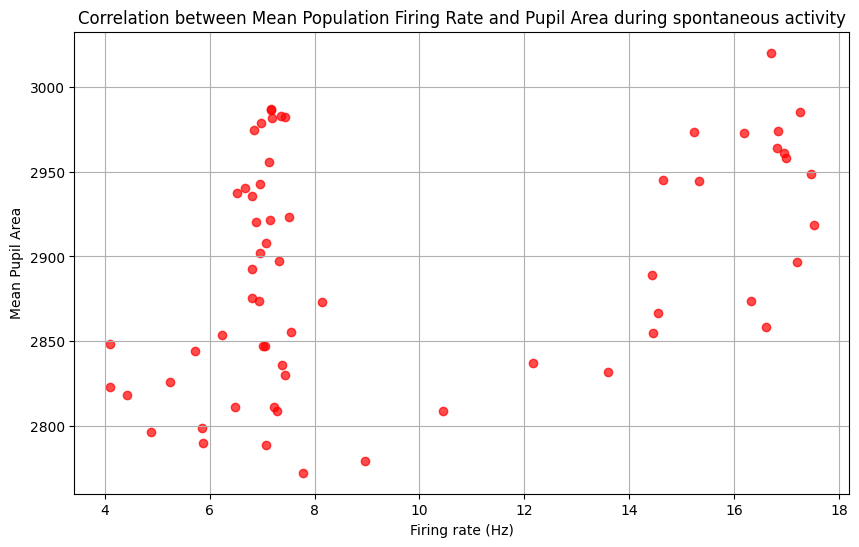

In [ ]:
# Create and plot the correlation
plt.figure(figsize=(10, 6))
plt.scatter(mean_fring_rate, downsampled_df['Mean_Pupil_Size'], marker='o', color='red', alpha=0.7)
plt.title(f'Correlation between Mean Population Firing Rate and Pupil Area during spontaneous activity')
plt.xlabel('Firing rate (Hz)')
plt.ylabel('Mean Pupil Area')
plt.grid(True)